In [137]:
import pandas as pd

df = pd.read_csv('../preprocessed/BNB.csv', parse_dates=['Date'],
                 date_format='%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'].str.replace(' UTC+0', ''))
df = df.set_index('Date').sort_index()
df


,Price,Volume,Market_cap
Date,,,
2017-09-16,0.107251,1.051223e+00,1.072506e+07
2017-09-17,0.154041,1.467859e+01,1.540413e+07
2017-09-18,0.173491,6.001767e+00,1.734912e+07
2017-09-19,0.168334,3.878927e+00,1.683342e+07
2017-09-20,0.166628,4.068762e+01,1.666279e+07
...,...,...,...
2025-02-17,666.924447,5.698604e+08,1.026104e+11
2025-02-18,647.553994,6.508925e+08,9.963016e+10
2025-02-19,652.756991,5.785377e+08,1.004307e+11


In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



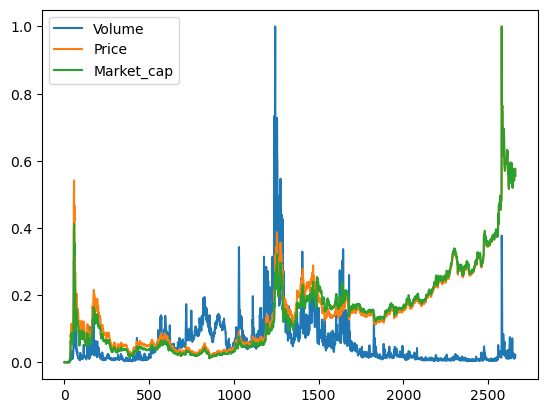

In [112]:
import matplotlib.pyplot as plt

plt.plot(df_normalized["Volume"])
plt.plot(df_normalized["Price"])
plt.plot(df_normalized["Market_cap"])
plt.legend(["Volume", "Price", "Market_cap"])
plt.show()


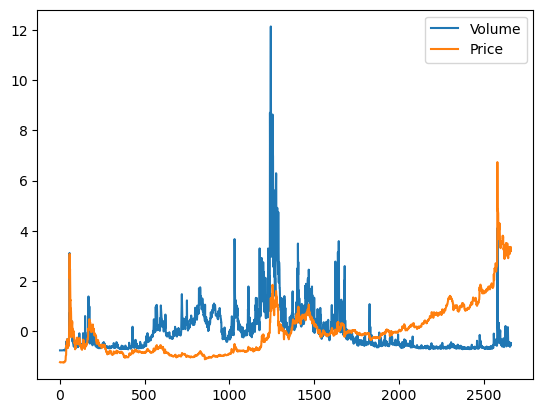

In [103]:
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


plt.plot(df_standardized["Volume"])
plt.plot(df_standardized["Price"])
plt.legend(["Volume", "Price"])
plt.show()


In [86]:
df.corr("pearson")
df


,Price,Volume,Market_cap
Date,,,
2017-11-09 00:00:00 UTC+0,0.002387,1.224287e+06,1.564042e+08
2017-11-10 00:00:00 UTC+0,0.002044,9.904228e+05,1.339685e+08
2017-11-11 00:00:00 UTC+0,0.001915,7.076430e+05,1.254706e+08
2017-11-12 00:00:00 UTC+0,0.001804,8.147892e+05,1.182352e+08
2017-11-13 00:00:00 UTC+0,0.002018,8.949856e+05,1.323864e+08
...,...,...,...
2025-02-17 00:00:00 UTC+0,0.238578,3.105406e+08,2.053995e+10
2025-02-18 00:00:00 UTC+0,0.238920,2.824324e+08,2.056878e+10
2025-02-19 00:00:00 UTC+0,0.242526,1.945916e+08,2.087879e+10


In [121]:

full_idx = pd.date_range(df.index.min(), df.index.max(), freq='D')
df_i = df.reindex(full_idx)
df_i = df_i.interpolate(method='linear')


In [122]:

full_idx = pd.date_range(df.index.min(), df.index.max(), freq='D')
df_f = df.reindex(full_idx)
df_f = df_f.interpolate(method='linear')


In [123]:
print(df_i.corr())
print(df_f.corr())

               Price    Volume  Market_cap
Price       1.000000  0.022874    0.990001
Volume      0.022874  1.000000   -0.036658
Market_cap  0.990001 -0.036658    1.000000
               Price    Volume  Market_cap
Price       1.000000  0.022874    0.990001
Volume      0.022874  1.000000   -0.036658
Market_cap  0.990001 -0.036658    1.000000


In [124]:
df['Price_change'] = df['Price'].diff()
df['Volume_change'] = df['Volume'].diff()
df['Market_cap_change'] = df['Market_cap'].diff()

In [125]:
df.corr()

,Price,Volume,Market_cap,Price_change,Volume_change,Market_cap_change
Price,1.000000,0.022874,0.990001,0.073453,0.012216,0.074263
Volume,0.022874,1.000000,-0.036658,0.090397,0.198457,0.085290
Market_cap,0.990001,-0.036658,1.000000,0.066810,0.010962,0.069269
Price_change,0.073453,0.090397,0.066810,1.000000,0.349082,0.985134
Volume_change,0.012216,0.198457,0.010962,0.349082,1.000000,0.336255
Market_cap_change,0.074263,0.085290,0.069269,0.985134,0.336255,1.000000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1693.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:42:13   Log-Likelihood:                -3739.7
No. Observations:                2714   AIC:                             7501.
Df Residuals:                    2703   BIC:                             7566.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5381      0.203     -7.584      0.0

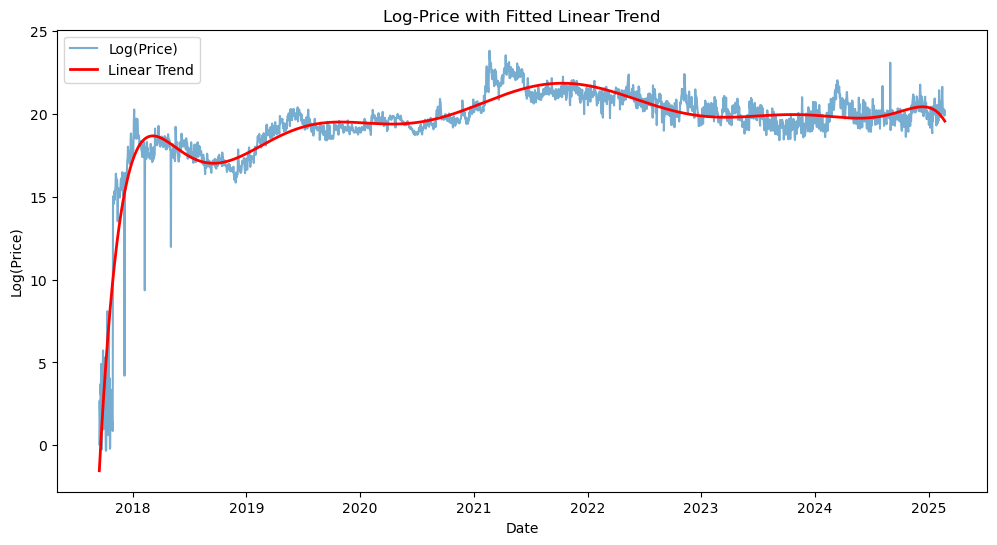

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Prepare data
# Use log of Price
y = np.log(df['Volume'].dropna())

# 1. Prepare time variable (centered)
t0 = df.index.min().toordinal()
t = np.array([(d.toordinal() - t0)/365 for d in df.index])  # in years

# 2. Build design matrix with polynomials up to degree 3
X_poly = np.column_stack([t, t**2, t**3, t**4, t**5, t**6, t**7, t**8, t**9, t**10])
X_poly = sm.add_constant(X_poly)

# 2. Fit OLS
model = sm.OLS(y.values, X_poly).fit()
print(model.summary())

# 3. Plot original + trend line
plt.figure(figsize=(12,6))
plt.plot(y.index, y, label='Log(Price)', alpha=0.6)
plt.plot(y.index, model.fittedvalues, color='red', label='Linear Trend', linewidth=2)
plt.title('Log-Price with Fitted Linear Trend')
plt.xlabel('Date')
plt.ylabel('Log(Price)')
plt.legend()
plt.show()


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     5751.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:43:29   Log-Likelihood:                -3292.5
No. Observations:                2714   AIC:                             6591.
Df Residuals:                    2711   BIC:                             6609.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7497     38.100    -62.145      0.0

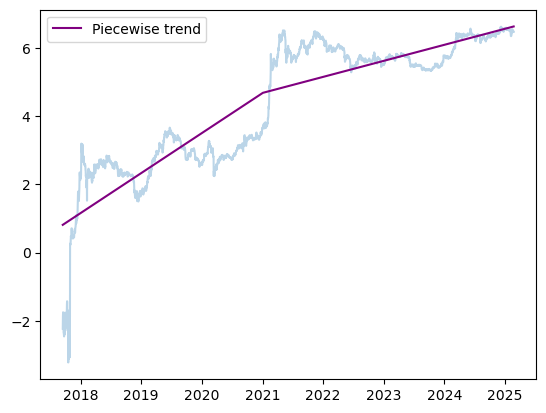

In [144]:
import statsmodels.api as sm

# 1. Choose a breakpoint (ordinal)
tb = pd.Timestamp('2021-01-01').toordinal()

# 2. Build design
x = df.index.map(pd.Timestamp.toordinal)
post = np.maximum(0, x - tb)
X_seg = np.column_stack([x, post])
X_seg = sm.add_constant(X_seg)

# 3. Fit
y = np.log(df['Price'])
model_seg = sm.OLS(y, X_seg).fit()
print(model_seg.summary())

# 4. Plot
y_hat = model_seg.predict(X_seg)
plt.plot(df.index, y, alpha=0.3)
plt.plot(df.index, y_hat, color='purple', label='Piecewise trend')
plt.legend(); plt.show()



In [146]:
# 1. Weekly “Close” (use last available price of each week)
weekly_price = df['Price'].resample('W-FRI').last()

# 2. Weekly volume (sum or mean)
weekly_volume = df['Volume'].resample('W-FRI').sum()

# 3. Weekly returns
weekly_return = weekly_price.pct_change()

# 4. Combine into a DataFrame
weekly = pd.DataFrame({
    'Price': weekly_price,
    'Volume': weekly_volume,
    'Return': weekly_return
})


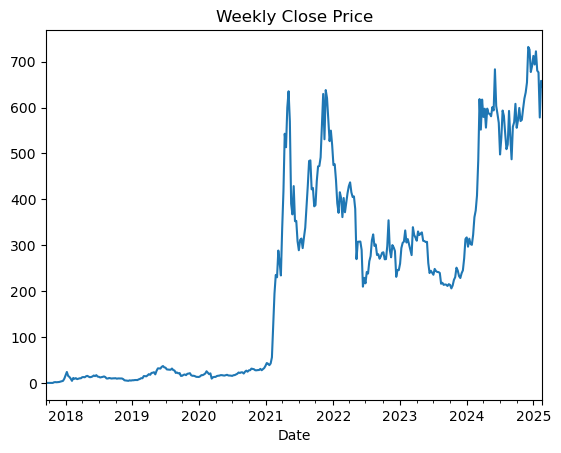

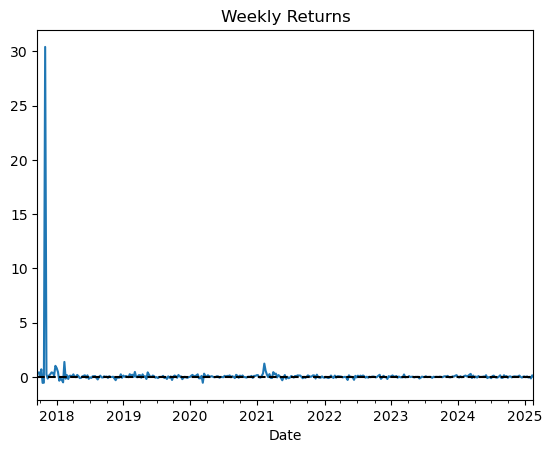

In [148]:
weekly['Price'].plot(title='Weekly Close Price')
plt.show()

weekly['Return'].plot(title='Weekly Returns')
plt.axhline(0, color='k', linestyle='--')
plt.show()


In [149]:
import numpy as np, statsmodels.api as sm

y_w = np.log(weekly['Price'].dropna())
t_w = (y_w.index.map(pd.Timestamp.toordinal) - y_w.index.min().toordinal()) / 7  # in weeks
X_w = sm.add_constant(t_w)

model_w = sm.OLS(y_w.values, X_w).fit()
print(model_w.params, " (weekly slope)")
print("Annualized growth ≈", model_w.params[1]*52*100, "% p.a.")


[1.53891068 0.01462647]  (weekly slope)
Annualized growth ≈ 76.0576544406817 % p.a.


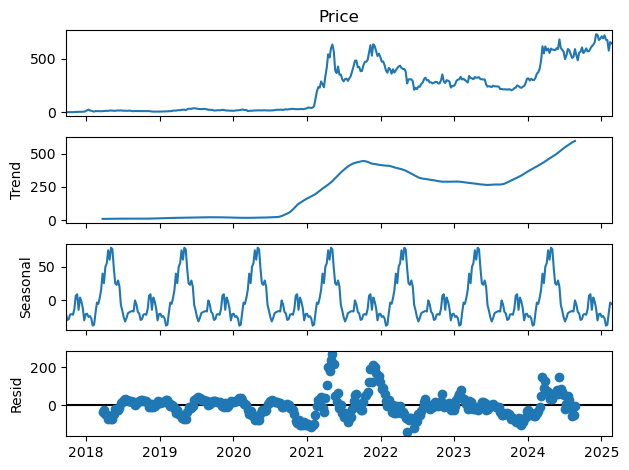

In [151]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(weekly['Price'].dropna(), model='additive', period=52)
decomp.plot()
plt.show()


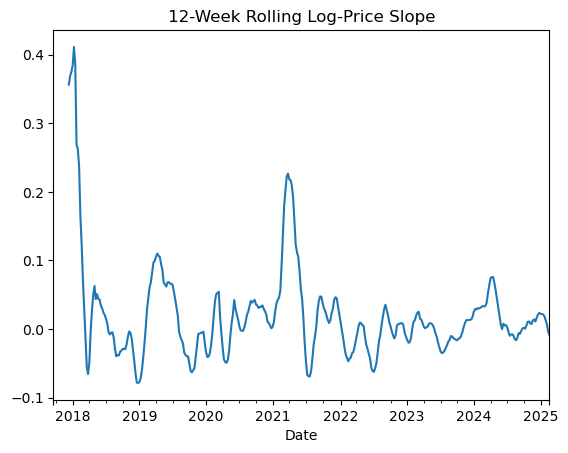

In [152]:
import statsmodels.api as sm

def rolling_slope(series, window=12):
    slopes = []
    dates  = []
    for i in range(window, len(series)):
        ywin = np.log(series.iloc[i-window:i])
        tnum = np.arange(window)
        Xwin = sm.add_constant(tnum)
        m = sm.OLS(ywin.values, Xwin).fit()
        slopes.append(m.params[1])
        dates.append(series.index[i])
    return pd.Series(slopes, index=dates)

weekly['TrendSlope_12w'] = rolling_slope(weekly['Price'], window=12)
weekly['TrendSlope_12w'].plot(title='12-Week Rolling Log-Price Slope')
plt.show()
